# Introduction

This tutorial will teach you how to access real life data and understand it visually.

For this article, we employ one of the data sets available in muenchen.de, containing information about Oktoberfest since 1985 until 2022. Although most of the years are not available (Oktoberfest started in 1810!), the data set provides valuable insights about how the festival evolved over the last 30 years.

The original data has been taken from here: https://www.opengov-muenchen.de/dataset/oktoberfest (no need to go there now)


So, let's jump into it!

# Libraries to Use

To evaluate the dataset, we use three different Python libraries: Pandas, Matplotlib, and Plotly.

- [Pandas](https://pandas.pydata.org/index.html) is a Python open source library for data science that allows us to easily work with structured data, such as **csv files, SQL tables, or Excel spreadsheets**. It provides tools for reading and writing data in different formats, carrying out exploratory analysis, and cleaning data (reshaping data sets, handling missing data, or merging data sets).

- [Matplotlib](https://matplotlib.org/) is a Python 2D plotting library that can be used in Python scripts, Jupyter notebooks, and IPython shells, among other environments, producing high quality figures. Matplotlib offers a wide range of visualizations such as histograms, bar chart, scatter plots, box plots, or pie charts.

- [Plotly Python](https://plot.ly/python/) graphing library provides as Matplotlib a wide range of visualizations. But, unlike Matplotlib the visualizations provided by Plotly are interactive and more intuitive. 😉
After this overview about the libraries used in this analysis, we are ready to start the next step: exploratory data analysis and data cleaning.

After this overview of the libraries used in this analysis, we are ready to load the dataset.

### Working with directories
This module provides a portable way of using operating system dependent functionality, such as retrieving information about paths and files



In [1]:
import os

### to see where we are currently working in
print(os.getcwd())

# os.path.join
# os.listdir()
# etc.


/content


### Working with paths
For a more intuitive approach of working with local files we use the module [pathlib](https://docs.python.org/3/library/pathlib.html) which we will discuss in a later exercise in more detail.



In [2]:
# importing the pathlib module - a handy library for working with the local file system in an object oriented way
from pathlib import Path

# creating a path object of our data directory within the mounted Google Drive
oktoberfest_path = Path('/content/')

print(oktoberfest_path)


/content


In [3]:
### to download the .csv file
!pip install wget

import wget

wget.download('https://opendata.muenchen.de/dataset/8d6c8251-7956-4f92-8c96-f79106aab828/resource/e0f664cf-6dd9-4743-bd2b-81a8b18bd1d2/download/oktoberfestgesamt19852022.csv')


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=adc239d046e5845ac18badeeabc73887053ffdb74cc636e31a00a8d3ba2bac55
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


'oktoberfestgesamt19852022.csv'

In [4]:
# print all the files and directories in our data path
print('\nFiles in our oktoberfest path:')
for file in oktoberfest_path.iterdir():
  print(file)


Files in our oktoberfest path:
/content/.config
/content/oktoberfestgesamt19852022.csv
/content/sample_data


Great... .csv files found.

CSV stands for comma-separated values. This is a text-based file format that stores tabular data with each line being a row and columns being separated by commas. Just like a minimalistic Excel file without formating and only values. ([More info on wikipedia](https://en.wikipedia.org/wiki/Comma-separated_values))

Let's take the 2022 version and save the path to a variable:



In [5]:
# create another pathlib object with the path to the csv file
oktoberfest_csv_path = oktoberfest_path / 'oktoberfestgesamt19852022.csv'

# make sure this is a file
assert oktoberfest_csv_path.is_file(), 'Error oktoberfest csv file not found!'
print('Oktoberfest csv file found:', oktoberfest_csv_path.is_file())

Oktoberfest csv file found: True


For convenience we load the CSV data into a Pandas data frame using the [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function and visualize the first 5 rows using the [pandas.DataFrame.head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) method.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# make plots look prettier
plt.style.use('ggplot')

# Load data into a pandas dataframe
df_oktoberfest = pd.read_csv(oktoberfest_csv_path)

# Print first 5 rows of the dataframe
df_oktoberfest.head(5)

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


The data set contains 8 columns: (1) year, (2) duration, (3) total visitors in million, (4) visitors per day in thousands, (5) price of beer, (6) consumption of beer in hektoliters, (7) price of chicken, (8) consumption of chicken.

We can also get the last 5 rows using the [pandas.DataFrame.tail](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) method.

In [7]:
# print the last 5 rows of the dataframe
df_oktoberfest.tail(5)

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
31,2016,17,5.6,329,10.57,66231,11.00,366876
32,2017,18,6.2,344,10.87,77836,11.41,466747
33,2018,16,6.3,394,11.30,78705,11.67,436492
34,2019,16,6.3,394,11.71,78502,12.15,434998
35,2022,17,5.7,335,13.45,71340,13.96,313636


Let's get a feeling for the data and print some statistics with the [pandas.DataFrame.describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method.

Of course you could also calculate single statistics like .mean(), .std() etc..

In [8]:
# generate and print descriptive statistics of the dataframe
df_oktoberfest.describe()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2002.555556,16.305556,6.297222,386.694444,7.053333,62476.611111,7.768889,564746.138889
std,10.635371,0.624246,0.398200,27.429723,2.770215,10196.196093,2.793060,129222.529768
min,1985.000000,16.000000,5.500000,329.000000,3.200000,48698.000000,3.920000,313636.000000
25%,1993.750000,16.000000,5.975000,369.000000,4.845000,53510.750000,5.317500,481139.250000
50%,2002.500000,16.000000,6.350000,394.000000,6.750000,61467.500000,8.130000,515646.000000
75%,2011.250000,16.000000,6.500000,406.000000,9.170000,71085.000000,9.890000,685465.750000
max,2022.000000,18.000000,7.100000,444.000000,13.450000,79225.000000,13.960000,807710.000000


In python, a dataframe is very similar to a dictionary. To get single columns you can use the column names.

In [9]:
# let's print the column names first
print(df_oktoberfest.columns)

Index(['jahr', 'dauer', 'besucher_gesamt', 'besucher_tag', 'bier_preis',
       'bier_konsum', 'hendl_preis', 'hendl_konsum'],
      dtype='object')


In [10]:
# get the column for the beer price via the dictionary syntax:
df_oktoberfest['bier_preis']

0      3.20
1      3.30
2      3.37
3      3.45
4      3.60
5      3.77
6      4.21
7      4.42
8      4.71
9      4.89
10     5.15
11     5.24
12     5.45
13     5.60
14     5.80
15     6.35
16     6.47
17     6.75
18     6.75
19     7.02
20     7.15
21     7.42
22     7.85
23     8.25
24     8.53
25     8.79
26     9.09
27     9.41
28     9.78
29     9.98
30    10.27
31    10.57
32    10.87
33    11.30
34    11.71
35    13.45
Name: bier_preis, dtype: float64

In [11]:
# You can also use a namespace to access the same column instead of the dictionary syntax:
df_oktoberfest.bier_preis

0      3.20
1      3.30
2      3.37
3      3.45
4      3.60
5      3.77
6      4.21
7      4.42
8      4.71
9      4.89
10     5.15
11     5.24
12     5.45
13     5.60
14     5.80
15     6.35
16     6.47
17     6.75
18     6.75
19     7.02
20     7.15
21     7.42
22     7.85
23     8.25
24     8.53
25     8.79
26     9.09
27     9.41
28     9.78
29     9.98
30    10.27
31    10.57
32    10.87
33    11.30
34    11.71
35    13.45
Name: bier_preis, dtype: float64

In [12]:
# Let's calculate the lowest price for one liter of beer recorded .. :-/
df_oktoberfest.bier_preis.min()

3.2

So how do we access a specific row?

Let's try the [pandas.DataFrame.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) function to view specific years. This function takes the index of each row as the argument, and outputs the corresponding row.

In [13]:
df_oktoberfest.iloc[[0]]

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.2,54541,4.77,629520


You can get multiple rows like this.


In [14]:
df_oktoberfest.iloc[[0,1,2]]

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859


Now, let's try to do some data anlaysis. One of the biggest change in German economy was the conversion from Deutsche Mark to Euro. This was roughly around 1999 to 2000. Let's check the data from that years.

In [15]:
df_oktoberfest.iloc[[12,13,14,15,16,17],:]

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
12,1997,16,6.4,400,5.45,55891,5.38,699562
13,1998,16,6.5,406,5.60,54782,5.34,603746
14,1999,16,6.5,406,5.80,60054,5.38,609661
15,2000,18,6.9,383,6.35,64591,7.85,681242
16,2001,16,5.5,344,6.47,48698,8.12,351705
17,2002,16,5.9,369,6.75,57614,8.10,459259


From 1999 to 2000 there is a sudden increase in the beer and chicken price. This can be attributed to the conversion of Deutsche Mark to Euro as the official currency of Germany.

We set year as the index of the data frame. To easily access the information of different years.

In [16]:
# Set year as the index of the data frame
df_oktoberfest.set_index('jahr', inplace=True)


# Print first 5 rows of the dataframe
df_oktoberfest.head()

,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
jahr,,,,,,,
1985,16,7.1,444,3.20,54541,4.77,629520
1986,16,6.7,419,3.30,53807,3.92,698137
1987,16,6.5,406,3.37,51842,3.98,732859
1988,16,5.7,356,3.45,50951,4.19,720139
1989,16,6.2,388,3.60,51241,4.22,775674


# Analysing the Data

Exploratory data analysis allow us to get a feeling about the data set and to get the data set ready to easily draw conclusions using it.
Let's try to answer some common questions.

### How did beer price change over the last 34 years? Is there a tendency?

Pandas provides a very convenient method for plotting our data frame: [pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

<Axes: xlabel='jahr'>

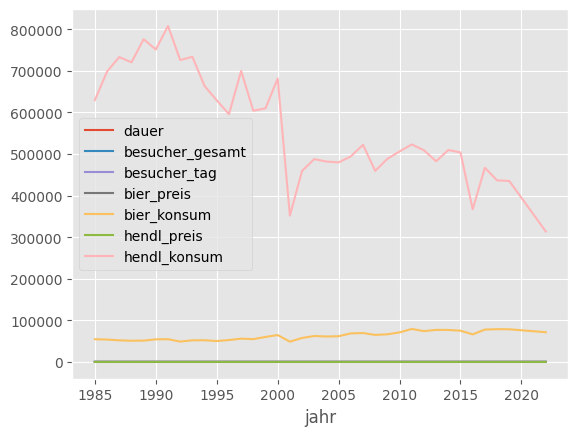

In [17]:
df_oktoberfest.plot()

This includes all the columns and is not really useful.

Let's specify more argument regarding the columns to include (y) and some formatting ([for more details check the pandas help](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)):

Text(0.5, 1.0, 'History of prices from 1985 until 2022')

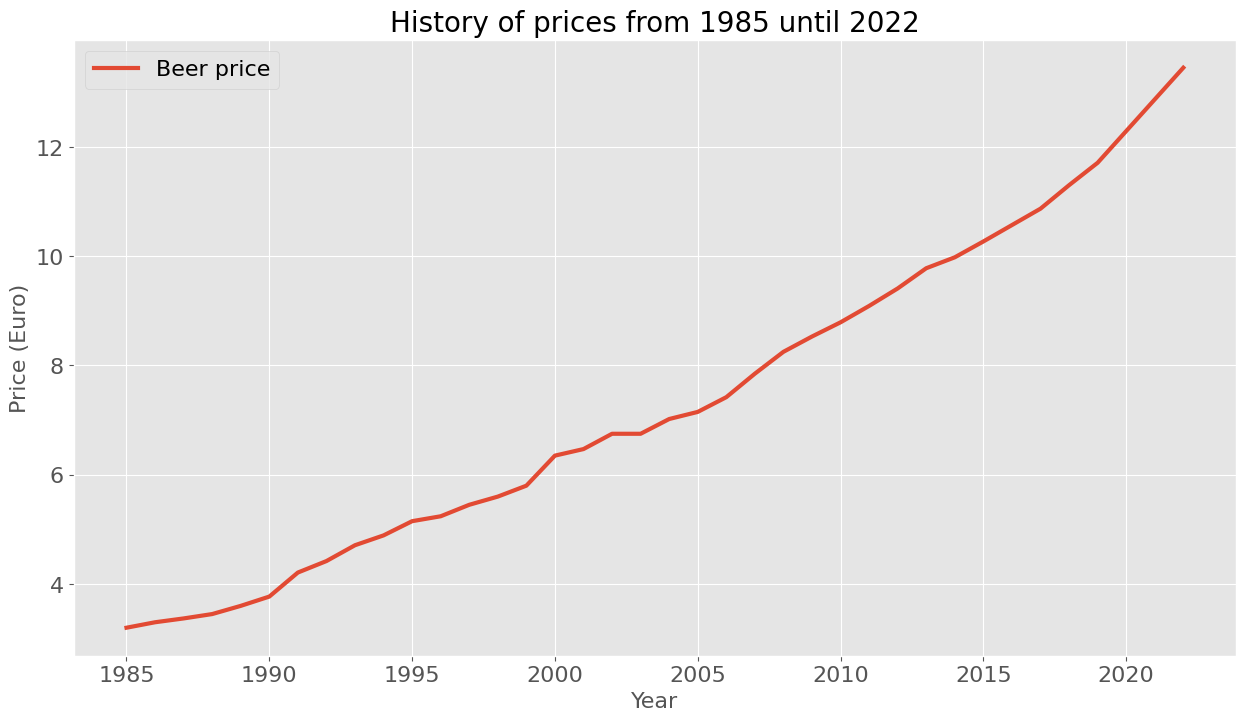

In [18]:
# Plot beer price
df_oktoberfest.plot(kind='line', y=['bier_preis'], figsize=(15,8), linewidth=3, fontsize=16)

# Title, labels and legend
plt.legend(labels=['Beer price'],fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Price (Euro)',fontsize=16)
plt.title('History of prices from 1985 until 2022',fontsize=20)

As we can see from the plot, the price of beer have increased steadily from 1985 until 2022,
Matter of fact, the price in 2022 is around four times more than in 1985.

Try to answer the following question yourself.

### How did chicken price change over the last 37 years?

Text(0.5, 1.0, 'Changes in chicken price over the last 37 years')

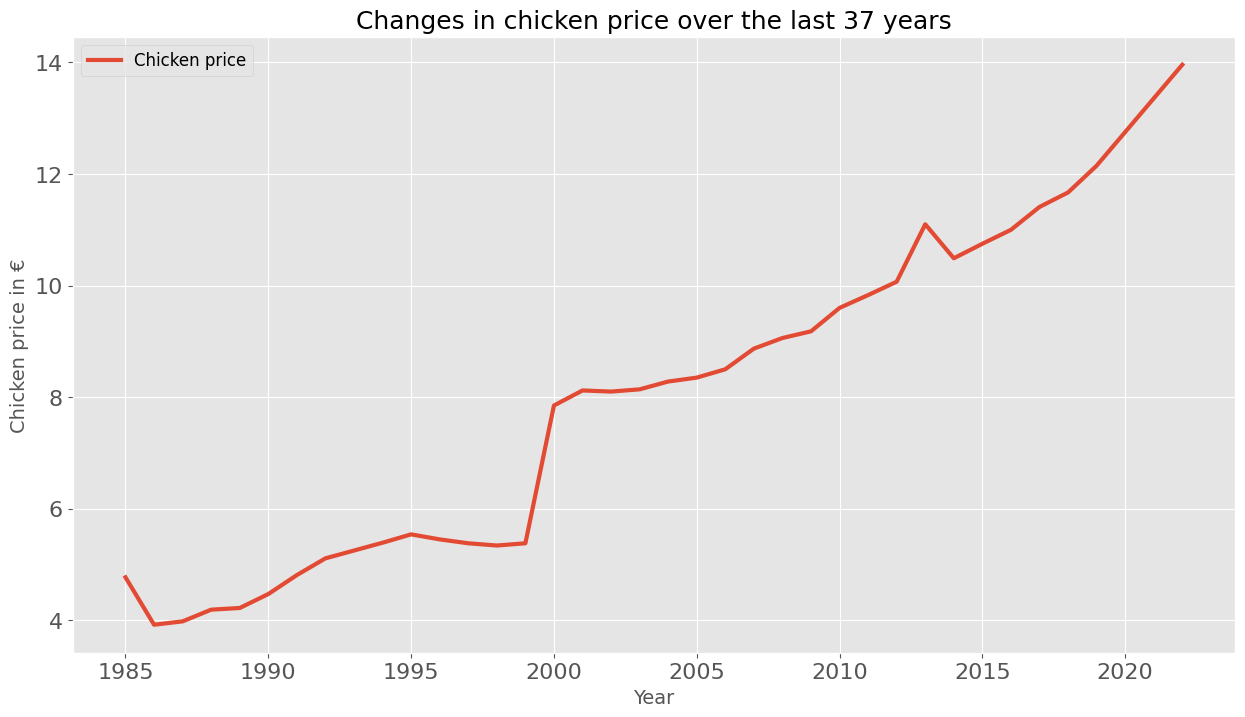

In [21]:
# Plot chicken price

df_oktoberfest.plot(kind='line', y='hendl_preis', figsize=(15,8), linewidth=3, fontsize=16)


# Title, labels and legend

plt.legend(labels=['Chicken price'], fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Chicken price in €', fontsize=14)
plt.title('Changes in chicken price over the last 37 years', fontsize=18)

In [22]:
# Price of a beer and a chicken in 1985
print(df_oktoberfest.loc[1985,['bier_preis','hendl_preis']].sum())


# Price of a beer and a chicken in 2022
print(df_oktoberfest.loc[2022,['bier_preis','hendl_preis']].sum())


7.97
27.41


So, you can see that a person in 1985 could enjoy a meal at the Oktoberfest for only 7.97 euros. Three decades later, we need almost three times more money (22.97 euros) to enjoy a meal at the festival.

Here we visualize a interactive plot of the prices

In [23]:
import plotly.graph_objects as go

# Interactive plots of the price of beer and chicken
year = df_oktoberfest.index
beer_price = df_oktoberfest.bier_preis
chicken_price = df_oktoberfest.hendl_preis

fig = go.Figure()

fig.add_trace(go.Scatter(x=year, y=chicken_price,
                    mode='lines+markers',
                    name='Chicken'))

fig.add_trace(go.Scatter(x=year, y=beer_price,
                    mode='lines+markers',
                    name='Beer'))

# Title, labels, and background
fig.update_layout(title='History of prices from 1985 until 2022',
                   xaxis_title='Year',
                   yaxis_title='Price (Euro)',
                   plot_bgcolor='white')

### Beer Consumption

Let's take a look at the beer consumption over the years.



/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning:

The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7e1986acfcd0> starts with '_'. It is thus excluded from the legend.



Text(0.5, 1.0, 'Consumption of bier')

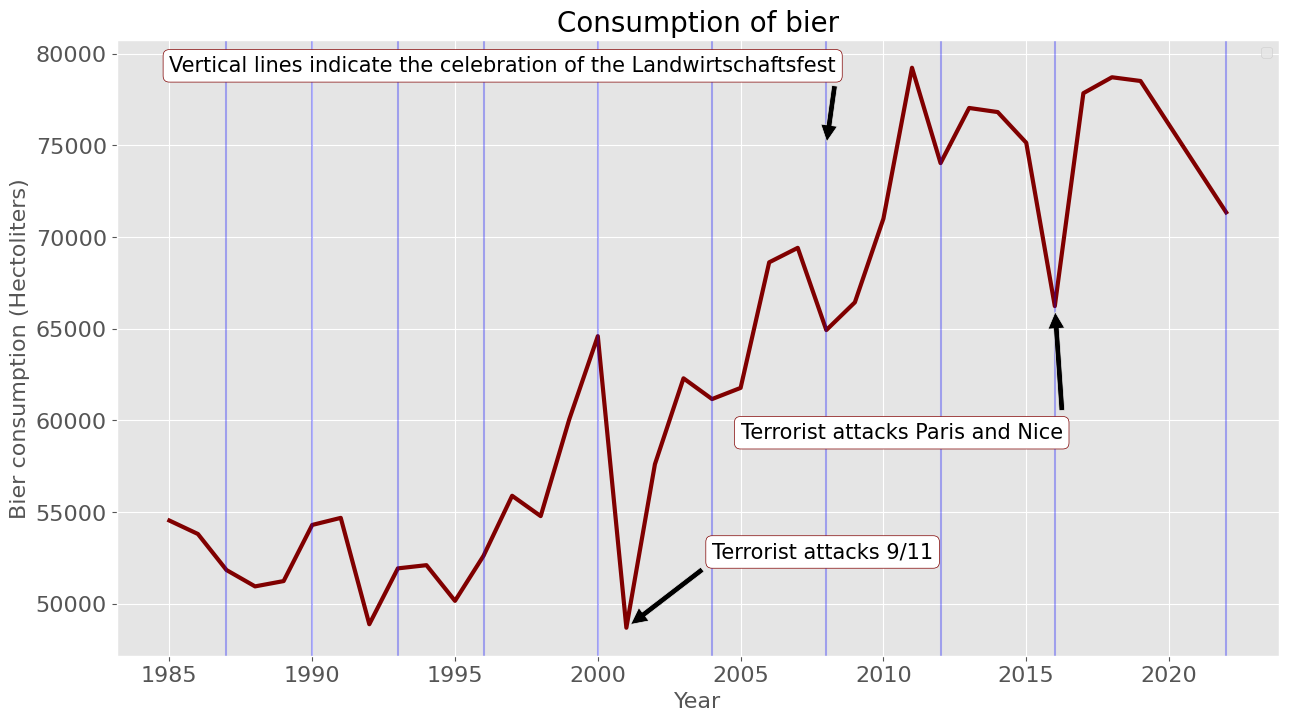

In [24]:
# Plot beer consumption
df_oktoberfest.plot(y='bier_konsum', figsize=(15,8), linewidth=3, fontsize=16, color='maroon', label='_nolegend_')

# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016, 2022]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest.
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)


# Annotations - celebration of the landwirtschaftsfest and terrorist attacks
plt.annotate('Vertical lines indicate the celebration of the Landwirtschaftsfest', xy=(2008, 75000), xytext=(1985, 79000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks 9/11', xy=(2001, df_oktoberfest.loc[2001,'bier_konsum']), xytext=(2004, 52500), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks Paris and Nice', xy=(2016, df_oktoberfest.loc[2016,'bier_konsum']), xytext=(2005, 59000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Bier consumption (Hectoliters)',fontsize=16)
plt.title('Consumption of bier',fontsize=20)

As we can observe, the consumption of beer presents a growing trend. The vertical lines indicate the years than the Oktoberfest coincided with the celebration of the Landswirtschaftsfest. This festival is celebrated every four years since 1996 (before every 3) at Theresienwiesen at the same time that Oktoberfest. We can see that small decreases in 2004, 2008, and 2012 could be related to the celebration of this festival.

On the contrary, the significant decreases of consumption of beer in 2001 and 2016 could be related to the September 11 terrorist attacks in 2001, the November 2015 Paris terrorist attacks, and the 2016 Nice truck attack. The number of visitors decreased in those years (2001 and 2016), showing the lowest values since 1985.


In [25]:
# Lowest number of visitors since 1985 in 2001,2016, and 1988.
df_oktoberfest.besucher_gesamt.sort_values().head(3)

jahr
2001    5.5
2016    5.6
2022    5.7
Name: besucher_gesamt, dtype: float64

### Chicken Consumption

Now, you try the same for the chicken consumption and see for yourself if we have the same trend as the beer consumption.

You would need to do only minor changes to the code of beer consumption.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning:

The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7e1983569660> starts with '_'. It is thus excluded from the legend.



Text(0.5, 1.0, 'Consumption of chicken')

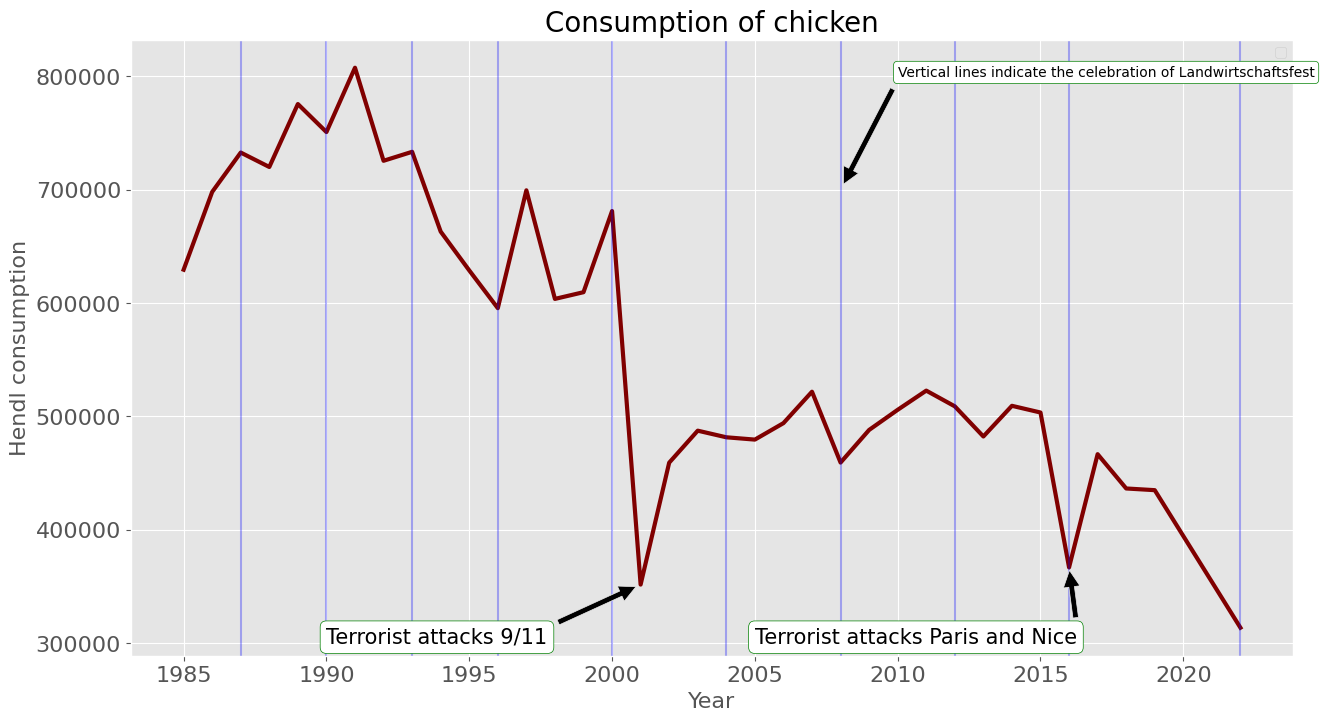

In [47]:


# Plot chicken consumption
df_oktoberfest.plot(y='hendl_konsum', figsize=(15,8), linewidth=3, fontsize=16, color='maroon', label='_nolegend_')

# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016, 2022]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest.
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)

# Annotations - celebration of the landwirtschaftsfest and terrorist attacks

plt.annotate('Vertical lines indicate the celebration of Landwirtschaftsfest', xy=(2008, 700000), xytext=(2010, 800000),
             arrowprops=dict(facecolor='black', shrink=0.05), bbox = dict(boxstyle="round", fc="w", ec="green"))
plt.annotate('Terrorist attacks 9/11', xy=(2001, df_oktoberfest.loc[2001, 'hendl_konsum']), xytext=(1990, 300000), fontsize=15,
             arrowprops=dict(facecolor='black', shrink=0.05), bbox = dict(boxstyle="round", fc="w", ec="green"))
plt.annotate('Terrorist attacks Paris and Nice', xy=(2016, df_oktoberfest.loc[2016, 'hendl_konsum']), xytext=(2005, 300000), fontsize=15,
             arrowprops=dict(facecolor='black', shrink=0.05), bbox = dict(boxstyle="round", fc="w", ec="green"))

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Hendl consumption',fontsize=16)
plt.title('Consumption of chicken',fontsize=20)


### Number of Visitors

Finally let's take a look at the total number of visitors from 1985 to 2022.

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:807: UserWarning:

The label '_nolegend_' of <matplotlib.lines.Line2D object at 0x7e19836b7250> starts with '_'. It is thus excluded from the legend.



Text(0.5, 1.0, 'Total number of visitors')

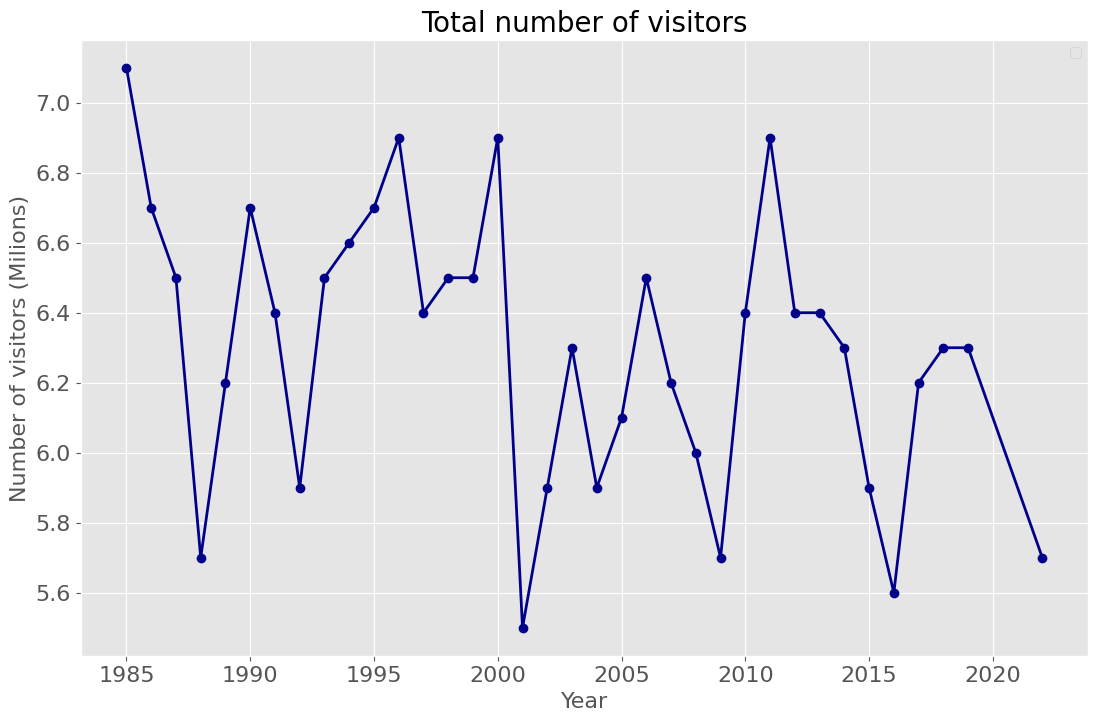

In [46]:
# Plot total number of visitors
df_oktoberfest.plot(y='besucher_gesamt', figsize=(13,8), marker='o', linewidth=2, fontsize=16, color='darkblue', label='_nolegend_')


# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of visitors (Milions)',fontsize=16)
plt.title('Total number of visitors',fontsize=20)

We can easily analyze the number of visitors by using the above plot. As we can observe, the number of visitors does not follow any trend, ranging from 5.5 to 7.1. So, the consumption of beer is not increasing because the festival has more visitors, but because the people drink more.


# References
- https://towardsdatascience.com/oktoberfest-quick-analysis-using-pandas-matplotlib-and-plotly-79778367a4c
- https://www.opengov-muenchen.de/dataset/oktoberfest
- https://pandas.pydata.org/index.html
- https://matplotlib.org/
- https://plot.ly/python/